In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


#### test have one less column of  survived, that we have to predict  

In [3]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### describe(include = ['O']) will show the descriptive statistics of object data types.

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McCoy, Miss. Agnes",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
train.isnull().sum()
#no. of missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Analysis of survived and not survived passengers


In [11]:
survived = train[train['Survived']== 1]
not_Survived = train[train['Survived']==0]

print(" no. of survived passengers : ", len(survived))
print(" no. of passengers who did not survived  : ", len(not_Survived))
print("% of survivers= ",round(float(len(survived)/len(train))*100.0 , 2))
print("% of  passengers who did not survived = ",round(float(len(not_Survived)/len(train))*100.0 , 2) )


 no. of survived passengers :  342
 no. of passengers who did not survived  :  549
% of survivers=  38.38
% of  passengers who did not survived =  61.62


In [12]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

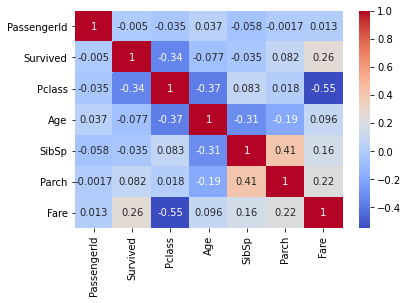

In [13]:
sns.heatmap(train.corr(), annot = True, cmap='coolwarm')

### We remove name cabin pasgid tkt because that are irrevelant for our model....... in the nest step we may handle all the missing values 

In [14]:
new_train = train.drop(columns=['Name', 'Cabin','PassengerId', 'Ticket'	])
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
obj_col = ['Sex', 'Embarked' ]
for i in obj_col:
    print(new_train[i].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [16]:
print(new_train['Age'].isnull().sum())
print(new_train['Embarked'].isnull().sum())


177
2


#### dependency on categorical variables 

In [17]:
print(new_train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean())
print('***************')
print(new_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean())
print('***************')
print(new_train[['SibSp', 'Survived']].groupby(['SibSp'],as_index=False).mean())
print('***************')
print(new_train[['Parch', 'Survived']].groupby(['Parch'],as_index=False).mean())


      Sex  Survived
0  female  0.742038
1    male  0.188908
***************
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
***************
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
***************
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


#### visualize the data to explain depnedency on numerical data 

c:\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


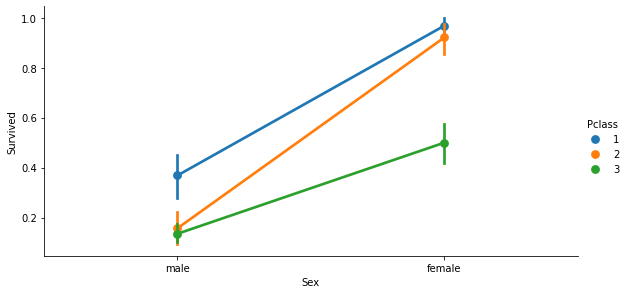

In [18]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

c:\python38\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


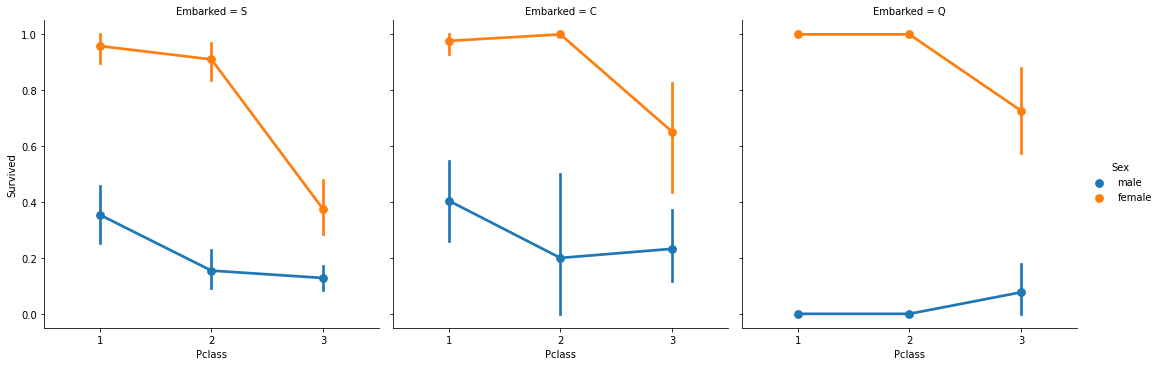

In [19]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

In [20]:
new_test = test.drop(columns=['Name', 'Cabin', 'Ticket'	])
new_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [21]:
new_train.shape ,  new_test.shape

((891, 8), (418, 8))

In [22]:
sex_map= {'male': 0 , 'female': 1}
new_test['Sex']= new_test['Sex'].map(sex_map)
new_train['Sex'] = new_train['Sex'].map(sex_map)
new_train['Sex'].unique() , new_test['Sex'].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [23]:
combine_both=[new_train, new_test]


In [24]:
new_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [25]:
new_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

### Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [26]:
for df in combine_both:
    age_mean = df['Age'].mean()
    age_std = df['Age'].std()
    age_null_count = df['Age'].isnull().sum()
    
    age_random_list = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null_count)
    df['Age'][np.isnan(df['Age'])] = age_random_list
    df['Age'] = df['Age'].astype(int)
    
new_train['AgeBand'] = pd.cut(new_train['Age'], 5)


<ipython-input-26-d315e7e94a81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][np.isnan(df['Age'])] = age_random_list


In [27]:
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,22,1,0,7.2500,S,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,"(32.0, 48.0]"


### Age Bands
### age- 0 to 16 ---> 0 band 
### age- 16 to 32---> 1 band
### age- 32 to 48 ---> 2 band
### age- 48 to 64 ---> 3 band
### age- > 64     ---> 4 band


In [28]:
for dataset in combine_both:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [29]:
new_train.Age.unique()

array([1, 2, 0, 3, 4])

#### Handling categorical varibale sibsp, Parch with the help of family size and determining new boolean class IsAlone  

In [30]:
for df in combine_both:
    df['Familysize']= df['SibSp']+df['Parch']+1
    print(df['Familysize'].unique())

[ 2  1  5  3  7  6  4  8 11]
[ 1  2  3  5  4  6  8  7 11]


In [31]:
new_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeBand', 'Familysize'],
      dtype='object')

In [32]:
for df in combine_both:
    df['IsAlone'] = 0
    df.loc[df['Familysize'] == 1, 'IsAlone'] = 1
    print(df['IsAlone'].unique())

[0 1]
[1 0]


#### 0 --> not alone      1---> alone 

In [33]:
print(new_train[['IsAlone', 'Survived']].groupby(['IsAlone'],as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [34]:
for df in combine_both:
    df = df.drop(columns=['Familysize', 'Parch','SibSp'])
    print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'AgeBand',
       'IsAlone'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone'], dtype='object')


In [35]:
new_train = new_train.drop(columns='AgeBand')
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,IsAlone
0,0,3,0,1,1,0,7.2500,S,2,0
1,1,1,1,2,1,0,71.2833,C,2,0
2,1,3,1,1,0,0,7.9250,S,1,1
3,1,1,1,2,1,0,53.1000,S,2,0
4,0,3,0,2,0,0,8.0500,S,1,1


#### Handling "embarked" categorical variable and its missing values using mod which will give its most occuring values 

In [36]:
mode = new_train['Embarked'].mode()[0]
mode

'S'

In [37]:
new_test['Embarked'] = new_train['Embarked'].fillna('S')
new_train['Embarked'] = new_train['Embarked'].fillna('S')
print(new_train.Embarked.unique())
print(new_test.Embarked.unique())

['S' 'C' 'Q']
['S' 'C' 'Q']


In [38]:
new_train[['Embarked', 'Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [39]:
embar_map= {'C': 1, 'Q':2 , 'S':0}
new_train['Embarked']= new_train['Embarked'].map(embar_map)
new_test['Embarked']= new_test['Embarked'].map(embar_map)

print(new_train['Embarked'].unique())
print(new_test['Embarked'].unique())

[0 1 2]
[0 1 2]


In [40]:
new_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,IsAlone
0,0,3,0,1,1,0,7.2500,0,2,0
1,1,1,1,2,1,0,71.2833,1,2,0
2,1,3,1,1,0,0,7.9250,0,1,1


#### Handling Fare and its missing values by using missing values and making it in bands using pd.qcut 

In [41]:
fare_med= new_train['Fare'].median()
fare_med

14.4542

In [42]:
for df in combine_both:
    df.Fare= df.Fare.fillna(fare_med)
    print(df.Fare.isnull().sum())

0
0


In [43]:
new_train.columns, new_test.columns


(Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Familysize', 'IsAlone'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Familysize', 'IsAlone'],
       dtype='object'))

In [44]:
new_train = new_train.drop(['SibSp', 'Parch','Familysize'], axis=1)
new_test = new_test.drop(['SibSp', 'Parch','Familysize','PassengerId'], axis=1)

In [45]:
new_train.columns, new_test.columns

(Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone'], dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone'], dtype='object'))

In [46]:
new_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,7.2500,0,0
1,1,1,1,2,71.2833,1,0
2,1,3,1,1,7.9250,0,1
3,1,1,1,2,53.1000,0,0
4,0,3,0,2,8.0500,0,1


In [47]:
new_test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,2,7.8292,0,1
1,3,1,2,7.0000,1,0
2,2,0,3,9.6875,0,1
3,3,0,1,8.6625,0,1
4,3,1,1,12.2875,0,0


In [48]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int32  
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    int64  
 5   IsAlone   418 non-null    int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 18.1 KB


In [49]:
for dataset in [new_train , new_test]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


In [50]:
new_train.Fare.unique()

array([0, 3, 1, 2])

In [51]:
new_test.Fare.unique()

array([0, 1, 2, 3])

In [52]:
new_test.Embarked.unique()

array([0, 1, 2], dtype=int64)

In [57]:
new_train.Embarked.unique()

array([0, 1, 2], dtype=int64)

In [58]:
new_test.info() , new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   Age       418 non-null    int32
 3   Fare      418 non-null    int32
 4   Embarked  418 non-null    int64
 5   IsAlone   418 non-null    int64
dtypes: int32(2), int64(4)
memory usage: 16.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int32
 4   Fare      891 non-null    int32
 5   Embarked  891 non-null    int64
 6   IsAlone   891 non-null    int64
dtypes: int32(2), int64(5)
memory usage: 41.9 KB


(None, None)

## Classification & Accuracy

In [64]:
X_train = new_train.drop('Survived', axis=1)
y_train = new_train['Survived']
X_test = new_test.copy()

X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [72]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,2,0,0,1
1,3,1,2,0,1,0
2,2,0,3,1,0,1
3,3,0,1,1,0,1
4,3,1,1,1,0,0


### Logistic Regression 

In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_logreg = round( clf.score(X_train, y_train) * 100, 2)
print (str(accuracy_logreg) + '%')

79.35%


### export gender submission

In [74]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })

In [75]:
submission.to_csv('submission.csv', index=False)